In [2]:
import tensorflow as tf
# Material from
# https://www.tensorflow.org/tutorials/keras/classification
# first try of ML models, trainings
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.6.0


In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
len(train_labels)

60000

In [7]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
test_images.shape

(10000, 28, 28)

In [11]:
len(test_labels)

10000

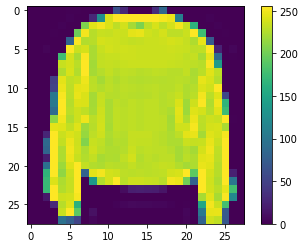

In [12]:
plt.figure()
plt.imshow(train_images[7])
plt.colorbar()
plt.grid(False)
plt.show()

In [13]:
train_images = train_images / 255.0

test_images = test_images / 255.0

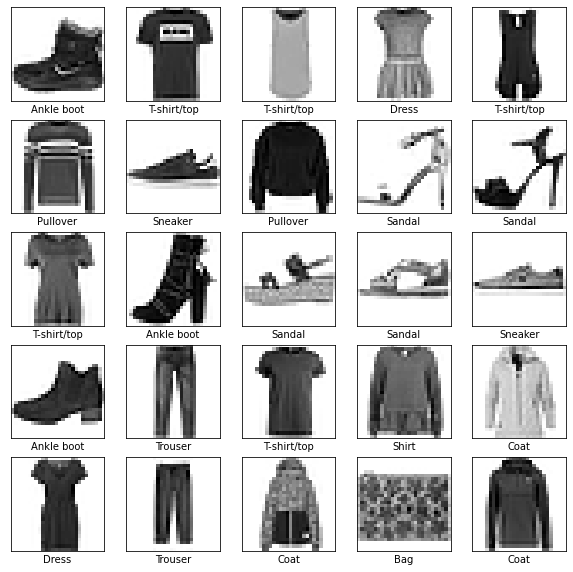

In [14]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(129, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [16]:
model.compile(  optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

In [17]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 2ms/step - loss: 0.5016 - accuracy: 0.8240
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3737 - accuracy: 0.8642
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3392 - accuracy: 0.8763
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3125 - accuracy: 0.8853
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2945 - accuracy: 0.8912
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2794 - accuracy: 0.8961
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2682 - accuracy: 0.9005
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2573 - accuracy: 0.9039
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2489 - accuracy: 0.9071
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.238

In [18]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)

313/313 - 1s - loss: 0.3351 - accuracy: 0.8826


In [19]:
print('\nTest accuracy:', test_acc)


Test accuracy: 0.8826000094413757


In [20]:
propability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = propability_model.predict(test_images)
predictions[0]
np.argmax(predictions[0])

9

In [21]:
test_labels[0]

9

In [23]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


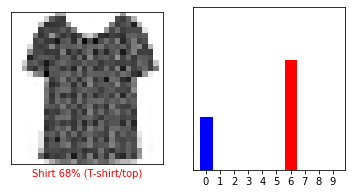

In [31]:
i = 1000
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

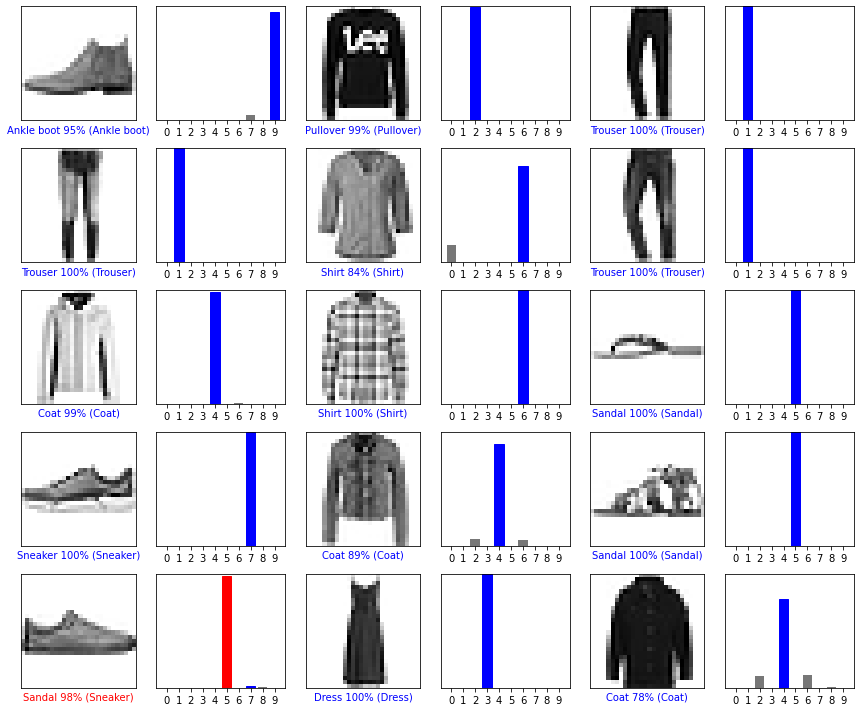

In [32]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [44]:
img = test_images[1]

print(img.shape)

(28, 28)


In [45]:
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


[[5.7881227e-04 5.1773350e-09 9.9441409e-01 6.2011095e-04 2.5713821e-03
  1.3163307e-21 1.8154187e-03 0.0000000e+00 1.0069637e-07 1.9378761e-38]]


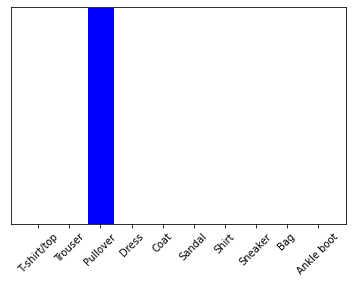

In [46]:
predictions_single = propability_model.predict(img)
print(predictions_single)

plot_value_array(1, predictions_single[0], test_labels)

_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [47]:
np.argmax(predictions_single[0])

2